# <a id='top'></a> Task 2.2 - Data Insights

After data cleaning, it's time for some funny explorations. The goal is to find meaningful insights for customers and their purchasing behavior.  
You will see univariate, bivariate, and multivariate analysis; some clustering attempts. This work's outcome is the input for the marketing team, so the job done must be more accurate possible.  
Beyond the simple analysis, let's try to answer some questions about data. These questions aren't part of the virtual internship.  
1. [What is the product most sold and the one that makes more profit?](#Question1)
2. [Are there insightful patterns of sales in time?](#Question2)
3. [What are the best features of most spending customers?](#Question3)
4. [Are there any differences for customers based on states or postcodes?](#Question4)

## Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [65]:
transactions = pd.read_csv("../Data/transactions.csv")
customer_address = pd.read_csv("../Data/customer_address.csv")
customer_demographic = pd.read_csv("../Data/customer_demographic.csv")

In [66]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20


In [67]:
customer_address.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [68]:
customer_demographic.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,missing_job_title,missing_job_industry,age,age_bins
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0,66,60-69
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,0,39,30-39
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0,0,66,60-69


## Exploratory Data Analysis

### <a id='Question1'></a> 1. What is the product most sold and the one that makes more profit?
##### [Top](#top)

In my opinion, this first question can be clarifying what are the products most sold and what are the most profitable.  
Try to discover if the Pareto principle is applicable in this particular case (20% of the products generate 80% of revenue).

In [69]:
# Check what product_id most sold
transactions['product_id'].value_counts()

0      1154
3       349
1       305
38      267
35      261
       ... 
71      134
16      134
8       132
100     126
47      118
Name: product_id, Length: 101, dtype: int64

In [70]:
transactions[transactions['product_id']==0].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1993-10-02
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,2006-11-10


The product_id most sold is the product 0. We suppose that this product_id represents different types of products because of the different list_prices and features. Maybe the product_id equal to 0 can be an id used to identify other products.  
It's worth to inspect this and find how much is the impact of this product_id on the total profit.

In [71]:
# Inspect if product_id 0 can be different products
transactions[transactions['product_id']==0]['list_price'].value_counts()

71.49     78
360.40    65
60.34     62
363.01    61
543.39    56
230.91    56
544.05    55
533.51    55
227.88    54
12.01     50
183.86    50
290.62    49
100.35    47
235.63    47
478.16    46
569.56    45
416.98    41
495.72    40
71.16     38
499.53    37
441.49    33
358.39    31
175.89    31
202.62    27
Name: list_price, dtype: int64

In [72]:
# Inspect if the others product_id have a single list price

# Create a list of product_id different from 0
product_list = transactions[transactions['product_id']!=0]['product_id'].unique().tolist()

# Select 10 products random and check if they has only one list_price value
for _ in range(10):
    index = np.random.randint(0,len(product_list))
    value_counts = transactions[transactions['product_id']==product_list[index]]['list_price'].value_counts()
    print(f'Product_id: {product_list[index]}')
    print(value_counts, '\n')

Product_id: 52
1280.28    144
1777.80     41
Name: list_price, dtype: int64 

Product_id: 39
1812.75    148
Name: list_price, dtype: int64 

Product_id: 28
1216.14    131
1703.52     49
Name: list_price, dtype: int64 

Product_id: 39
1812.75    148
Name: list_price, dtype: int64 

Product_id: 21
1071.23    147
1466.68     50
Name: list_price, dtype: int64 

Product_id: 93
1065.03    121
1458.17     45
Name: list_price, dtype: int64 

Product_id: 33
1311.44    146
1810.00     47
Name: list_price, dtype: int64 

Product_id: 91
100.35    132
642.31     54
Name: list_price, dtype: int64 

Product_id: 59
1061.56    142
1415.01     57
Name: list_price, dtype: int64 

Product_id: 62
478.16     146
1024.66     36
Name: list_price, dtype: int64 



In [73]:
transactions[transactions['product_id']==19].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
27,28,19,76,2017-12-23,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,2016-07-09
190,196,19,1315,2017-12-21,1.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1999-06-23
223,229,19,2687,2017-03-13,1.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,2011-08-29
705,723,19,1284,2017-07-28,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,2009-03-08
790,811,19,700,2017-07-10,1.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,2009-03-08


So my hypotesis that product_id equal to 0 can be the aggregation of different products is correct, but other products too have different list_prices and features.  
The next step is to understand if the combination of product_id, brand, product_line, product_class and product_size can be a better identifier for single products.

In [74]:
product_list = list(zip(transactions['product_id'].map(str),transactions['brand'],transactions['product_line'],transactions['product_class'],transactions['product_size']))
transactions['product_category'] = ['-'.join(tups) for tups in product_list] 
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large


In [75]:
grouped_product = transactions.groupby(['product_category'])['list_price'].nunique().reset_index()
print(f'Unique combination of product_id and product features are: {grouped_product.shape[0]}')

Unique combination of product_id and product features are: 188


In [76]:
grouped_product[grouped_product['list_price']!=1]

,product_category,list_price
2,0-Norco Bicycles-Road-medium-medium,2
8,0-OHM Cycles-Standard-medium-medium,2
11,0-Solex-Standard-medium-medium,4
12,0-Trek Bicycles-Road-medium-medium,2
13,0-Trek Bicycles-Standard-high-medium,2
27,13-Solex-Standard-medium-medium,2
71,36-Solex-Standard-low-medium,2
103,54-WeareA2B-Standard-medium-medium,2
139,74-WeareA2B-Standard-medium-medium,2
158,85-WeareA2B-Standard-medium-medium,2


Ok, the results are better than the previous analysis. Almost every combination of product_id and product features have only one list_price. Only eight product combinations (4.3%) have two or more list_prices; this is an aspect not covered in this virtual internship. In a real project, this needs some inspections (sales on sale, promotion for a customer, etc.) to understand our dataset better.

In [77]:
# Add column profit for every transaction
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']

# Create a groupby with count and profit for each product
impact_product = transactions.groupby(['product_category'])['profit'].agg(['count','sum']).reset_index()
impact_product.sort_values('count', inplace=True, ascending=False)

In [78]:
impact_product.head(10)

,product_category,count,sum
58,3-Trek Bicycles-Standard-medium-large,349,594189.95
17,1-Giant Bicycles-Standard-medium-medium,266,119348.88
71,36-Solex-Standard-low-medium,204,127357.96
11,0-Solex-Standard-medium-medium,204,22591.83
103,54-WeareA2B-Standard-medium-medium,193,233890.92
139,74-WeareA2B-Standard-medium-medium,192,158108.16
40,2-Solex-Standard-medium-medium,191,3413.17
27,13-Solex-Standard-medium-medium,188,118259.76
158,85-WeareA2B-Standard-medium-medium,186,114948.44
76,4-Giant Bicycles-Standard-high-medium,176,79490.40


In [79]:
# Explore the impact of every product in percentage (count and profit)
impact_product['% total_count'] = round(impact_product['count']/impact_product['count'].sum()*100,2)
impact_product['% total_profit'] = round(impact_product['sum']/impact_product['sum'].sum()*100,2)

# Sort values for % of total profit
impact_product.sort_values('% total_profit', inplace=True, ascending=False)
impact_product.head(10)

,product_category,count,sum,% total_count,% total_profit
58,3-Trek Bicycles-Standard-medium-large,349,594189.95,1.80,5.54
107,57-WeareA2B-Touring-medium-large,170,277142.50,0.87,2.58
103,54-WeareA2B-Standard-medium-medium,193,233890.92,0.99,2.18
72,37-OHM Cycles-Standard-low-medium,151,233236.11,0.78,2.17
85,44-WeareA2B-Standard-medium-medium,136,225879.68,0.70,2.11
128,68-OHM Cycles-Standard-medium-medium,141,224498.79,0.73,2.09
138,73-Solex-Standard-medium-medium,134,216041.50,0.69,2.01
104,55-Trek Bicycles-Road-medium-large,166,215041.38,0.85,2.00
155,83-Solex-Touring-medium-large,151,212745.41,0.78,1.98
74,38-Trek Bicycles-Standard-medium-large,111,188983.05,0.57,1.76


In [59]:
impact_product['cum_sum_perc_total_count'] = impact_product['% total_count'].cumsum()
impact_product['cum_sum_perc_total_profit'] = impact_product['% total_profit'].cumsum()
impact_product.head(25)

,product_category,count,sum,% total_count,% total_profit,cum_sum_perc_total_count,cum_sum_perc_total_profit
58,3-Trek Bicycles-Standard-medium-large,349,594189.95,1.80,5.54,1.80,5.54
107,57-WeareA2B-Touring-medium-large,170,277142.50,0.87,2.58,2.67,8.12
103,54-WeareA2B-Standard-medium-medium,193,233890.92,0.99,2.18,3.66,10.30
72,37-OHM Cycles-Standard-low-medium,151,233236.11,0.78,2.17,4.44,12.47
85,44-WeareA2B-Standard-medium-medium,136,225879.68,0.70,2.11,5.14,14.58
128,68-OHM Cycles-Standard-medium-medium,141,224498.79,0.73,2.09,5.87,16.67
138,73-Solex-Standard-medium-medium,134,216041.50,0.69,2.01,6.56,18.68
104,55-Trek Bicycles-Road-medium-large,166,215041.38,0.85,2.00,7.41,20.68
155,83-Solex-Touring-medium-large,151,212745.41,0.78,1.98,8.19,22.66
74,38-Trek Bicycles-Standard-medium-large,111,188983.05,0.57,1.76,8.76,24.42


Wow. This analysis can be an important discovery: from the top 10 most sold products, only two of them are in the top 10 of the most profitable products (the third is in the 25th position).  
Moreover, the top 25 products combined represent 20% of the products sold and  47% of the total profit.

### <a id='Question2'></a> 2. Are there insightful patterns of sales in time?
##### [Top](#top)

In [80]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82


#### Daily Sales

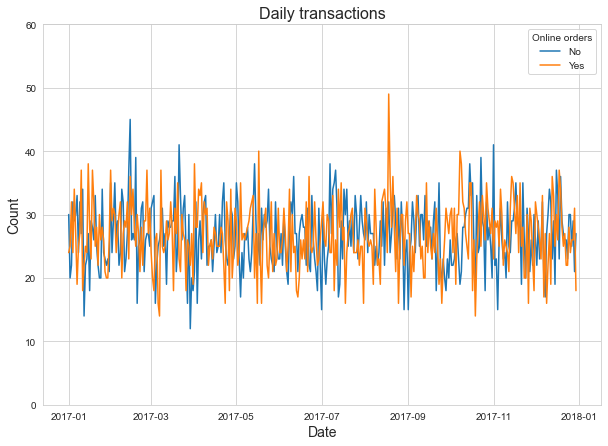

In [131]:
# Count the sales for every day
grouped_date = transactions.groupby(['transaction_date','online_order'])['transaction_id'].agg(['count']).reset_index()

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.lineplot(data=grouped_date, x="transaction_date", y="count", hue='online_order')
plt.legend(labels=['No','Yes'], title='Online orders')
plt.title('Daily transactions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0,60)
plt.show()

#### Weekly sales

In [105]:
transactions['week'] = transactions['transaction_date'].dt.isocalendar().week
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit,week
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61,42
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36,35
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82,39


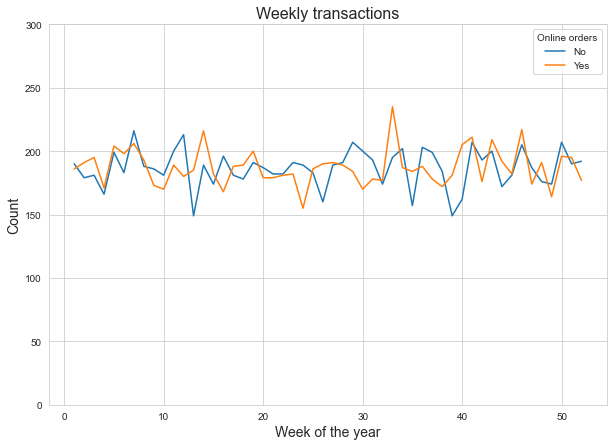

In [130]:
# Count the sales for every week
grouped_week = transactions.groupby(['week','online_order'])['transaction_id'].agg(['count']).reset_index()
grouped_week.head()

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.lineplot(data=grouped_week, x="week", y="count", hue="online_order")
plt.title('Weekly transactions', fontsize=16)
plt.legend(labels=['No','Yes'], title='Online orders')
plt.xlabel('Week of the year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0,300)
plt.show()

#### Monthly sales

In [113]:
# Let's check the month
transactions['month'] = transactions['transaction_date'].dt.month
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit,week,month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8,2
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61,42,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36,35,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82,39,10


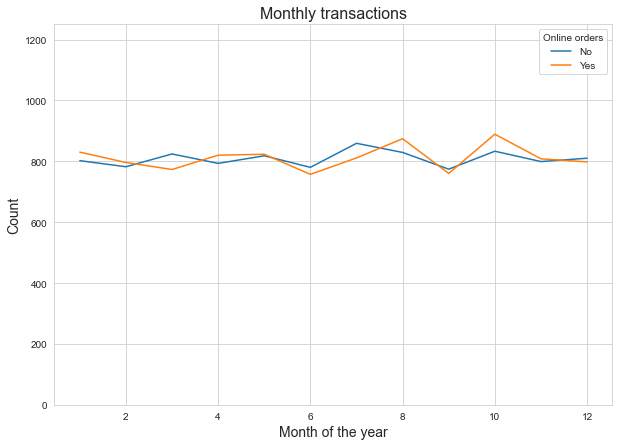

In [134]:
# Count the sales for every month
grouped_month = transactions.groupby(['month','online_order'])['transaction_id'].agg(['count']).reset_index()
grouped_month.head()

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.lineplot(data=grouped_month, x="month", y="count", hue='online_order')
plt.legend(labels=['No','Yes'], title='Online orders')
plt.title('Monthly transactions', fontsize=16)
plt.xlabel('Month of the year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, 1250)
plt.show()

#### Day of the week sales

In [145]:
transactions['day_of_week'] = transactions['transaction_date'].dt.dayofweek
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_category,profit,week,month,day_of_week
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2-Solex-Standard-medium-medium,17.87,8,2,5
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,3-Trek Bicycles-Standard-medium-large,1702.55,20,5,6
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,37-OHM Cycles-Standard-low-medium,1544.61,42,10,0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,88-Norco Bicycles-Standard-medium-medium,817.36,35,8,3
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,78-Giant Bicycles-Standard-medium-large,1055.82,39,10,6


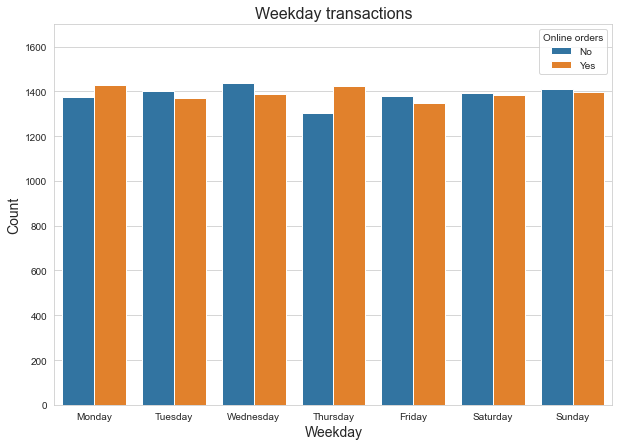

In [178]:
# Count the sales for every month
grouped_dow = transactions.groupby(['day_of_week','online_order'])['transaction_id'].agg(['count']).reset_index()
grouped_dow.head()

name_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
number_days = np.arange(0,7)

# Let's plot the trend of sales
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
ax = sns.barplot(data=grouped_dow, x="day_of_week", y="count", hue="online_order")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes'], title="Online orders", loc='upper right')

plt.title('Weekday transactions', fontsize=16)
plt.xticks(number_days, name_days)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, 1700)
plt.show()

<BarContainer object of 7 artists>
<BarContainer object of 7 artists>


#### Online order

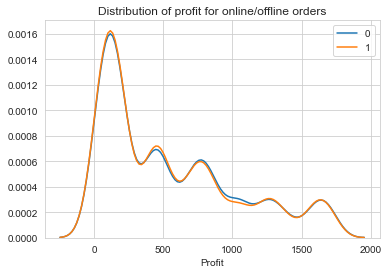

In [135]:
# Let's explore the distribution of profit for online order colum
online_order_0 = transactions[transactions['online_order']==0]
online_order_1 = transactions[transactions['online_order']==1]

# Plot the two distributions
sns.kdeplot(online_order_0['profit'], label='0')
sns.kdeplot(online_order_1['profit'], label='1')
plt.xlabel("Profit")
plt.title("Distribution of profit for online/offline orders")
plt.show()

Interesting plot that shows two things, one bad and one good:
* The bad one is that order online, or offline does not affect the profit (they have an identical distribution).
* The good one is that there are five peaks in these two distributions. A hypothesis can be that these peaks are five different clusters of products.

#### Order status

In [ ]:
transactions['order_status'].value_counts()

#### Brand

In [ ]:
# Let's compare the brand sales and profit
brand = transactions.groupby('brand')['profit'].agg(['sum','count']).reset_index()

brand['% total_count'] = round(brand['count']/brand['count'].sum()*100,2)
brand['% total_profit'] = round(brand['sum']/brand['sum'].sum()*100,2)
brand['ratio_profit_count'] = round(brand['% total_profit']/brand['% total_count'],2)
brand.head(10)

In [ ]:
brand_melted = pd.melt(brand, id_vars=['brand'], value_vars=['% total_count','% total_profit'])
brand_melted.head()

In [ ]:
# Brand Revenue
plt.figure(figsize=(7,5))

sns.barplot(y='brand', x='value', hue='variable', data=brand_melted)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Brand name', fontsize=12)
plt.title('% Profit vs % number of transactions', fontsize=14)
plt.show()

I want to inspect some more the two brands with the highest difference between how in the percentage they affect the profit and the total transactions.

In [ ]:
# WeareA2B
trans_weareA2B = transactions[transactions['brand']=='WeareA2B']

trans_weareA2B = trans_weareA2B.groupby(['brand','product_line','product_class','product_size'])['profit'].agg(['count','sum']).reset_index()

In [ ]:
trans_weareA2B['% total_count'] = round(trans_weareA2B['count']/trans_weareA2B['count'].sum()*100,2)
trans_weareA2B['% total_profit'] = round(trans_weareA2B['sum']/trans_weareA2B['sum'].sum()*100,2)
trans_weareA2B['ratio_profit_count'] = round(trans_weareA2B['% total_profit']/trans_weareA2B['% total_count'],2)
trans_weareA2B.head(10)

In [ ]:
# Norco Bicycles
trans_norco = transactions[transactions['brand']=='Norco Bicycles']
trans_norco = trans_norco.groupby(['brand','product_line','product_class','product_size'])['profit'].agg(['count','sum']).reset_index()

In [ ]:
trans_norco['% total_count'] = round(trans_norco['count']/trans_norco['count'].sum()*100,2)
trans_norco['% total_profit'] = round(trans_norco['sum']/trans_norco['sum'].sum()*100,2)
trans_norco['ratio_profit_count'] = round(trans_norco['% total_profit']/trans_norco['% total_count'],2)
trans_norco.head(10)

#### Product line

In [ ]:
sns.countplot(transactions['product_line'], color='steelblue')
plt.xlabel('Product line', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Line', fontsize=14)
plt.show()

#### Product class

In [ ]:
sns.countplot(transactions['product_class'], color='steelblue')
plt.xlabel('Product class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Class', fontsize=14)
plt.show()

#### Product size

In [ ]:
sns.countplot(transactions['product_size'], color='steelblue')
plt.xlabel('Product size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Size', fontsize=14)
plt.show()

#### List price

In [ ]:
transactions['list_price'].describe()

In [ ]:
sns.kdeplot(transactions['list_price'], shade=True)
plt.xlabel('List Price', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.title('Distribution of List prices', fontsize=14)
plt.show()

#### Top 10 most selled Product

In [ ]:
best_products = transactions.groupby(['brand','product_id','product_line','product_class','product_size'])['profit'].agg(['count','sum']).reset_index()
best_products.sort_values('count', inplace=True, ascending=False)
best_products.head(10)

#### Top 10 Product more impactful on profit

In [ ]:
best_products['% total_count'] = round(best_products['count']/best_products['count'].sum()*100,2)
best_products['% total_profit'] = round(best_products['sum']/best_products['sum'].sum()*100,2)
best_products['ratio_profit_count'] = round(best_products['% total_profit']/best_products['% total_count'],2)

best_products.sort_values('% total_profit', inplace=True, ascending=False)
best_products.head(10)

We've found something right here. A lot of most sold products aren't in the top 10 most impactful profit's products.
This analysis is fantastic; we found some insights on products that can help the marketing/sales team. Maybe they can make relevant the most profit impactful products on their marketing campaigns. It's ever useful to know how much is the impact not only in terms of the number of transactions.

#### Distribution of list price for product line, product class and product size

In [ ]:
transactions['product_category'] = transactions['product_line'].map(str) + '-' + transactions['product_class'].map(str) + '-' + transactions['product_size'].map(str)
transactions.head()

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(y='product_category', x='list_price', data=transactions)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.title('Range of prices for Product Category', fontsize=14)
plt.show()

In [ ]:
smm = transactions[transactions['product_category']=='Standard-medium-medium'].copy()
smm['product_id'] = 'product_' + smm['product_id'].map(str)
smm.head()

In [ ]:
plt.figure(figsize=(20,14))
sns.boxplot(y='product_id', x='list_price', data=smm)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.title('Range of prices for Product Category', fontsize=14)
plt.show()